In [1]:
#####################
# Library Loading
#####################
library(tidyverse)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.1     ✔ dplyr   0.8.4
✔ tidyr   0.8.1     ✔ stringr 1.4.0
✔ readr   1.1.1     ✔ forcats 0.3.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************




In [2]:
#####################
# Config Theme
#####################
theme_set(theme_minimal())
options(repr.plot.width=10, repr.plot.height=10, repr.plot.res=200)

In [3]:
#####################
# Color Pallett
#####################
GroupID_Color_List = c("CCR6 Naïve"="#88008A", "CCR6 -"="#FFA500", "CCR6+1"="#0456f8", "CCR6+2"="#1D8F06", "CCR6+3"="#e51134")
GroupID_Order_List = c("CCR6 Naïve", "CCR6 -", "CCR6+1", "CCR6+2", "CCR6+3")
GroupID_Label_List = c("CCR6 Naïve"="Naive", "CCR6 -"=expression(paste("CCR6"^neg)), "CCR6+1"=expression(paste("CCR6"^low)), "CCR6+2"=expression(paste("CCR6"^int)), "CCR6+3"=expression(paste("CCR6"^high)))

In [4]:
#####################
# Input/Output
#####################
expression_file_Path = "../Data/Fluidigm_Donor123_normalized_Expression_value.txt"

In [5]:
#####################
# Read I/O
#####################
expression_DF = read_tsv(expression_file_Path)
head(expression_DF)
#dim(expression_DF)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_character()
)

See spec(...) for full column specifications.



X1,AHR,CCR6,IL12RB2,IL4,RORA,ARNTL,CD4,GATA3,IL13,⋯,ETS1,IKZF2,IL22,KLRB1,TNF,CCR4,FOXP3,IL10,IL23R,ZBTB16
CCR6 Naïve,0.00982739,0.1780915,NA,NA,NA,NA,0.1709545,NA,NA,⋯,0.24876377,0.2008182,NA,NA,-0.02926141,0.4098769,NA,NA,NA,NA
CCR6 Naïve,-0.04200061,NA,NA,NA,-0.6537119,NA,0.6158653,NA,NA,⋯,0.66112441,NA,0.20641346,0.2394349,0.10155813,0.5529650,NA,NA,NA,NA
CCR6 Naïve,0.35053309,0.5163577,NA,NA,NA,NA,0.3557625,NA,NA,⋯,0.39528846,NA,NA,0.2434757,NA,0.6424681,NA,NA,NA,NA
CCR6 Naïve,-0.07009269,0.3211466,NA,NA,-0.8297395,NA,0.2648416,NA,NA,⋯,-0.01096937,-0.3470482,0.09656456,NA,NA,0.2401297,-0.1666828,-0.8613782,NA,NA
CCR6 Naïve,-0.33900639,0.1023111,NA,NA,NA,NA,0.2414793,-0.05949125,NA,⋯,0.54710947,NA,0.09669367,NA,NA,0.3285374,NA,-0.1001966,NA,NA
CCR6 Naïve,0.84546644,NA,NA,NA,NA,NA,NA,NA,NA,⋯,0.77109898,NA,NA,NA,NA,1.2120764,NA,NA,NA,NA


In [6]:
####################
#Data Wrangling
####################
TH1_Gene_List = c("IFNG", "TBX21", "CXCR3", "IL17A")
TH2_Gene_List = c("IL4", "IL13", "GATA3", "IL17A")
TH17_Gene_List = c("IL17A", "CCL20", "RORC", "IL22")
Gene_Association_List = list()
Gene_Association_List[[2]] = TH1_Gene_List
Gene_Association_List[[3]] = TH2_Gene_List
Gene_Association_List[[1]] = TH17_Gene_List

In [27]:
####################
#Plotting
####################
Gene_Association_Plot_List = list()
for (each_gene_list_index in 1:length(Gene_Association_List)){
    ##
    gene_plot_List = list()
    Gene_combinations_List = combn(Gene_Association_List[[each_gene_list_index]],2,simplfy=FALSE)
    for (each_pair_index in 1:ncol(Gene_combinations_List)){
        ##
        
        each_combination_Pairs = as.list(Gene_combinations_List[,each_pair_index])
        Xvalue =Gene_combinations_List[,each_pair_index][[1]]
        Yvalue = Gene_combinations_List[,each_pair_index][[2]]
        
        #
        gene_plot_List[[each_pair_index]] = ggplot(data=expression_DF, 
                        aes_string(x=Xvalue, y=Yvalue, label=quote(X1), color=quote(X1))) +
                        geom_point(size = 1, na.rm =TRUE) +
                        geom_hline(yintercept=0, size=0.1) + 
                        geom_vline(xintercept=0, size=0.1) + 
                        scale_color_manual(breaks = GroupID_Order_List,values=GroupID_Color_List, limits=GroupID_Order_List,labels=GroupID_Label_List) +
                        labs(title = NULL, subtitle = NULL, caption = NULL, tag = NULL, x=Xvalue, y=Yvalue) +
                        theme(
                            #Title
                            aspect.ratio=1,
                            legend.position="none",
                            panel.border = element_rect(color = "black", fill = NA),
                            axis.title.x = element_text(size=12,  family="sans", face="plain", color = "black", hjust = 0.5),
                            axis.title.y = element_text(size=12,  family="sans", face="plain", color = "black", hjust = 0.5, vjust=0),
                            axis.text.x = element_text(size=6,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
                            axis.text.y = element_text(size=6,  family="sans", face="plain", color = "black", angle=0, vjust=0.5),
                            #plot.margin=margin(l=0.5,t=0,r=0,b=0,unit="cm")
                       ) 
       if(length(Gene_Association_List[[each_gene_list_index]]) > 3){
            Gene_Association_Plot_List[[each_gene_list_index]] = plot_grid(plotlist=gene_plot_List, nrow=1)
        }else{
            Gene_Association_Plot_List[[each_gene_list_index]] = plot_grid(plotlist=gene_plot_List, nrow=1)
        }
        
    }

}
Gene_Association_Plot_Object = plot_grid(plotlist=Gene_Association_Plot_List, nrow=3, rel_widths = c(1, 1, 1),
                                 label_fontfamily = "sans", label_fontface = "bold", label_colour = "black", label_size=10)


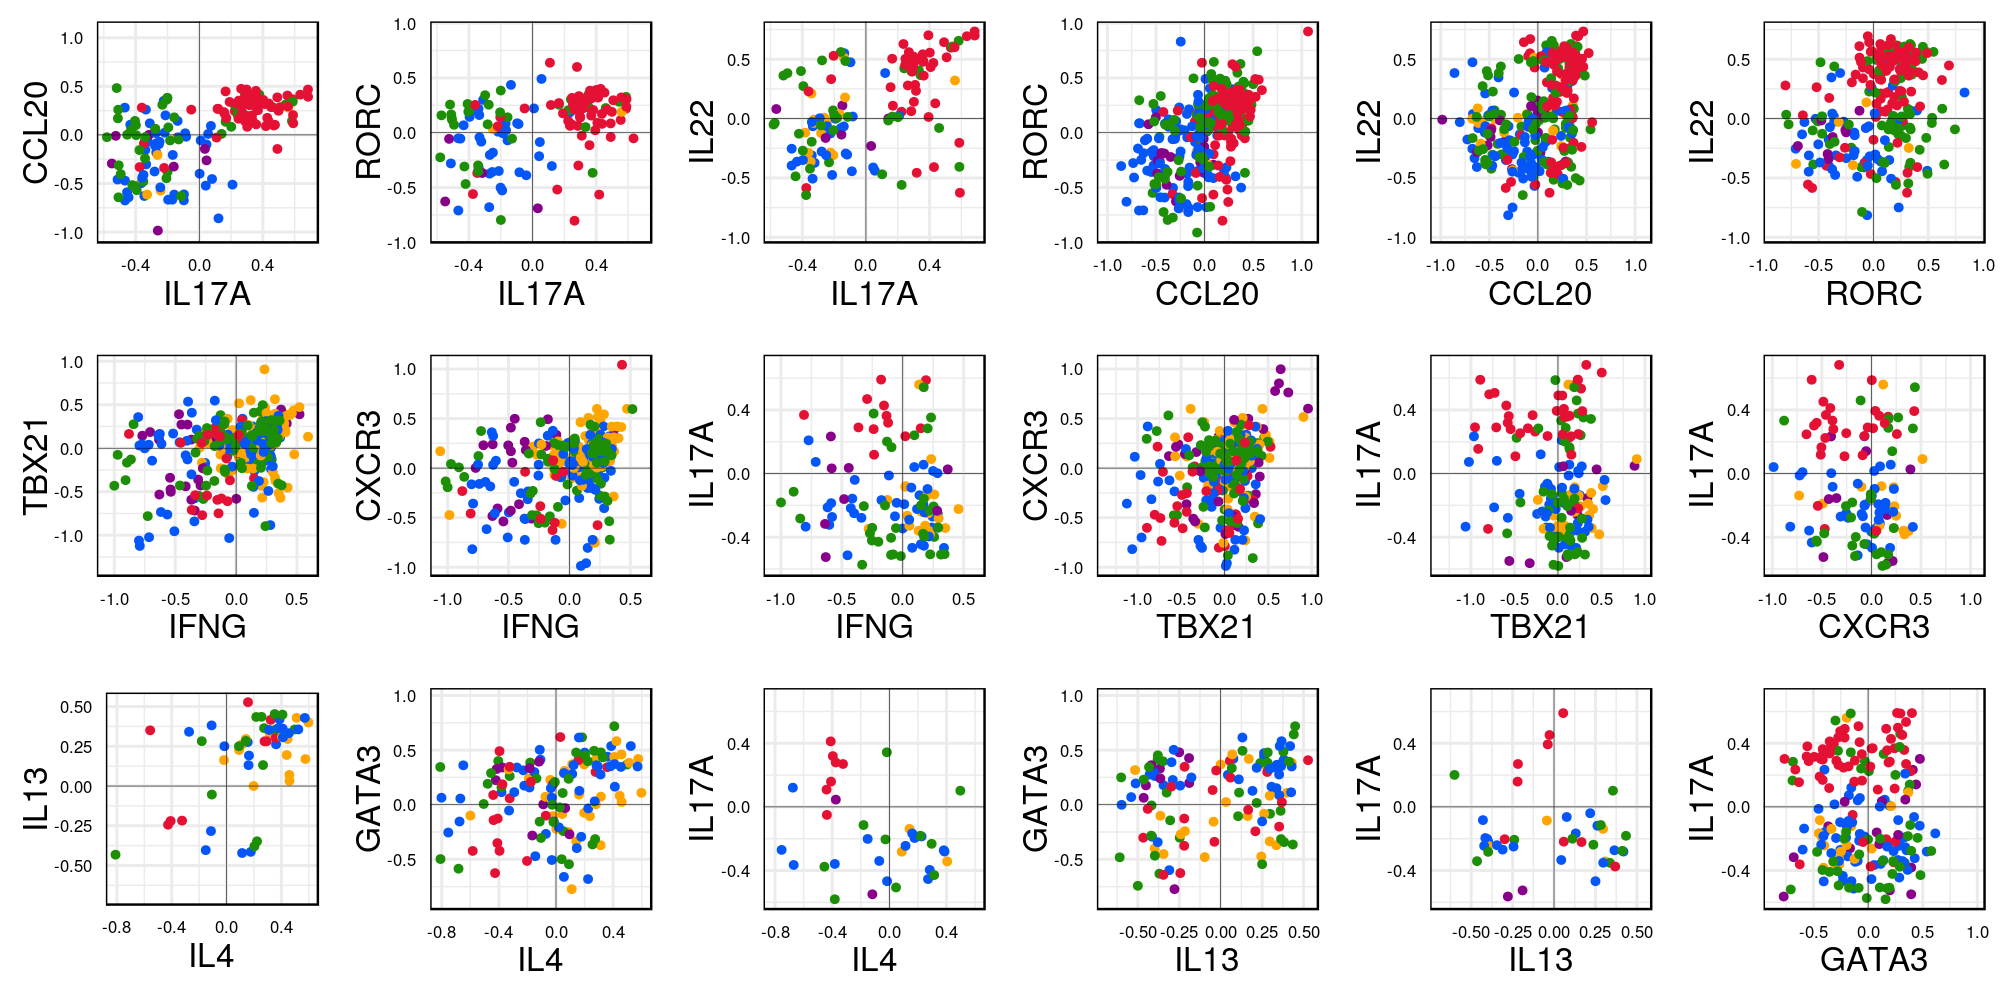

In [28]:
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res=200)
Gene_Association_Plot_Object

In [26]:
##################
# SAVE PDF
##################
ggsave(file="../Result/Fluidigm_scRNA_GeneAssociation.png", device="png", plot=Gene_Association_Plot_Object, width = 10, height = 5, units = "in", dpi=600)

In [10]:
##################
# SAVE OBJECT
##################
Gene_Association_Plot_Object = plot_grid(Gene_Association_Plot_Object, nrow=1)
saveRDS(Gene_Association_Plot_Object, "../Object/Fluidigm_scRNA_GeneAssociation.rds")